# Introduction:

We will analyze the population and house vacancy of each neighborhood to determine the best neighborhood to commit crime in.

Using the arrest data analysis, we will be able to find the neighborhood with the lowest arrests/person.

Dataset: https://data.wprdc.org/dataset/pgh/resource/9890875b-c1d1-4e64-8fc9-a4a8dc433745

## Importing Pandas

In [1]:
import pandas as pd
import numpy as np

## Importing the dataset

In [2]:
df_total = pd.read_csv("pop.csv")

## Separating the data into population and % vacancy

We can find each neighborhood in the 'Neighborhood' column of the original data frame. We can then also find the values for population and % housing vacancy associated with each neighborhood.

In [3]:
df_pop = df_total[['Neighborhood', 'Population (2010)']].copy()
df_percent_vacant = df_total[['Neighborhood','% Vacant Units (2010)']].copy()
df_pop.head(30)

,Neighborhood,Population (2010)
0,Allegheny Center,933
1,Allegheny West,462
2,Allentown,"2,500"
3,Arlington,"1,869"
4,Arlington Heights,244
5,Banksville,"4,144"
6,Bedford Dwellings,"1,202"
7,Beechview,"7,974"
8,Beltzhoover,"1,925"
9,Bloomfield,"8,442"


## Importing Caden's arrest data
Just copy/paste of all of Caden's code here. In the complete notebook, this would have already been here. This is needed because of the combination of two datasets to create one metric.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
arrestsData = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")
incidents_per_neighborhood = arrestsData.groupby('INCIDENTNEIGHBORHOOD')['AGE'].count()
incidents_per_neighborhood.sort_values(ascending = False)

INCIDENTNEIGHBORHOOD
Central Business District    3532
South Side Flats             3012
Carrick                      2082
East Allegheny               1889
Homewood South               1856
                             ... 
Regent Square                  32
Central Northside              23
Mt. Oliver Boro                18
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: AGE, Length: 98, dtype: int64

### Finding how things are indexed within this data
To inform us on how we will access the data later, we test out here how to find a neighborhood's arrest value. We find that we can index via the neighborhood name.

In [5]:
print(incidents_per_neighborhood)
x = incidents_per_neighborhood['Chateau']
print(x)

INCIDENTNEIGHBORHOOD
Allegheny Center       1117
Allegheny West          114
Allentown               849
Arlington               262
Arlington Heights       130
                       ... 
Upper Lawrenceville     169
West End                250
West Oakland            273
Westwood                201
Windgap                 103
Name: AGE, Length: 98, dtype: int64
392


## Finding arrests/person for each neighborhood
Using the separated data from the incidents_per_neighborhood dataframe, we can find the amount of arrests and compare that to the total population.

For the purposes of future analysis (for when we combine every metric and do our overall analysis), we will subtract all of these values from 5.

### Finding neighborhood inconsistencies
First, we need to find if there are any inconsistencies in the neighborhoods across each dataset. This later lets us prune neighborhoods that aren't neighborhoods, and include any name variations.

In [6]:
nh1 = []
nh2 = incidents_per_neighborhood.index.values
for i in range(len(df_pop)):
    nh_name = df_pop['Neighborhood'][i]
    nh1.append(nh_name)
    
print(list(set(nh1).symmetric_difference(set(nh2))))

['Mt. Oliver Neighborhood', 'Central North Side', 'Troy Hill-Herrs Island', 'Mt. Oliver Boro', 'Mt. Oliver', 'Outside State', 'Mount Oliver', 'Outside County', 'Golden Triangle/Civic Arena', 'Outside City']


### Compiling data per neighborhood into a dictionary
Now that we know what neighborhood inconsistencies we have to deal with, we can begin to compile all of the data into a dictionary, with neighborhood as the key and a list of their pop/arrests as the value.

In [7]:
nh1 = []
nh2 = incidents_per_neighborhood.index.values

vals_ratio = {}
for i in range(len(df_pop)):
    nh_name = df_pop['Neighborhood'][i]
    nh1.append(nh_name)
    pop_val = int(df_pop['Population (2010)'][i].replace(',',''))
    if nh_name == 'Central Northside':
        arrest_val = incidents_per_neighborhood['Central North Side']
    elif nh_name == 'Mt. Oliver':
        arrestval = incidents_per_neighborhood['Mt. Oliver Boro']
        arrestval += incidents_per_neighborhood['Mount Oliver']
        arrestval += incidents_per_neighborhood['Mt. Oliver Neighborhood']
    elif nh_name == 'Troy Hill':
        arrestval = incidents_per_neighborhood['Troy Hill-Herrs Island']
    elif nh_name in ['Outside County', 'Outside City', 'Outside State', 'Golden Triangle/Civic Arena']:
        pass
    else:
        arrest_val = incidents_per_neighborhood[nh_name]
    vals_ratio[nh_name] = [pop_val,arrest_val]
print(vals_ratio)

{'Allegheny Center': [933, 1117], 'Allegheny West': [462, 114], 'Allentown': [2500, 849], 'Arlington': [1869, 262], 'Arlington Heights': [244, 130], 'Banksville': [4144, 255], 'Bedford Dwellings': [1202, 580], 'Beechview': [7974, 1068], 'Beltzhoover': [1925, 457], 'Bloomfield': [8442, 875], 'Bluff': [6600, 1305], 'Bon Air': [808, 229], 'Brighton Heights': [7247, 975], 'Brookline': [13214, 1187], 'California-Kirkbride': [761, 255], 'Carrick': [10113, 2082], 'Central Business District': [3629, 3532], 'Central Lawrenceville': [4482, 397], 'Central Northside': [2923, 756], 'Central Oakland': [6086, 466], 'Chartiers City': [477, 38], 'Chateau': [11, 392], 'Crafton Heights': [3814, 510], 'Crawford-Roberts': [2256, 726], 'Duquesne Heights': [2425, 177], 'East Allegheny': [2136, 1889], 'East Carnegie': [570, 46], 'East Hills': [3169, 1022], 'East Liberty': [5869, 1633], 'Elliott': [2381, 586], 'Esplen': [301, 186], 'Fairywood': [1002, 108], 'Fineview': [1285, 749], 'Friendship': [1785, 150], '

## Computing the arrests/pop ratio
Next, we replace the list value for each neighborhood with the value of their arrests/pop ratio. Although the way this is done is fairly crude, it still works!

In [8]:
for i in vals_ratio:
    vals_ratio[i] = vals_ratio[i][1]/vals_ratio[i][0]
print(vals_ratio)

{'Allegheny Center': 1.197213290460879, 'Allegheny West': 0.24675324675324675, 'Allentown': 0.3396, 'Arlington': 0.14018191546281433, 'Arlington Heights': 0.5327868852459017, 'Banksville': 0.06153474903474904, 'Bedford Dwellings': 0.4825291181364393, 'Beechview': 0.13393528969149737, 'Beltzhoover': 0.2374025974025974, 'Bloomfield': 0.10364842454394693, 'Bluff': 0.19772727272727272, 'Bon Air': 0.2834158415841584, 'Brighton Heights': 0.13453842969504623, 'Brookline': 0.08982896927501136, 'California-Kirkbride': 0.33508541392904073, 'Carrick': 0.20587362800355977, 'Central Business District': 0.9732708735188758, 'Central Lawrenceville': 0.08857652833556448, 'Central Northside': 0.2586383852206637, 'Central Oakland': 0.07656917515609596, 'Chartiers City': 0.07966457023060797, 'Chateau': 35.63636363636363, 'Crafton Heights': 0.13371788148925012, 'Crawford-Roberts': 0.32180851063829785, 'Duquesne Heights': 0.07298969072164949, 'East Allegheny': 0.8843632958801498, 'East Carnegie': 0.08070175

### Insights
We can see some *very* interesting things here. The major thing that pops out is the neighborhood Chateau with a ratio of ~35.6arrests/person. That is crazy, and the math checks out! In 2010, Chateau had a population of 11 according to the dataset, while it had 392 arrests in that area. Maybe people consistently fled to that area -- who knows. All we know is that police are very active there -- if we want to commit crime and *not* get caught, Chateau is not the place to be.

### Final computation for ratio
The final computation we do is creating a new dictionary that contains all neighborhoods and (their ratio times 10) subtracted from 100. This helps us greatly with our final analysis, so it's easier to do now rather than later.

We want to find the place with the lowest ratio, and since our analysis relies on computing some geometry, it helps us to have that low ratio value be associated with a high number. Multiplying by 10 helps us see differences between neighborhoods much easier, since a lot of these ratios are very small decimals.

In [9]:
vals_ratio_adj = {}
for i in vals_ratio:
    vals_ratio_adj[i] = 100-(vals_ratio[i])
print(vals_ratio_adj)

{'Allegheny Center': 98.80278670953912, 'Allegheny West': 99.75324675324676, 'Allentown': 99.6604, 'Arlington': 99.85981808453718, 'Arlington Heights': 99.4672131147541, 'Banksville': 99.93846525096525, 'Bedford Dwellings': 99.51747088186356, 'Beechview': 99.8660647103085, 'Beltzhoover': 99.76259740259741, 'Bloomfield': 99.89635157545605, 'Bluff': 99.80227272727272, 'Bon Air': 99.71658415841584, 'Brighton Heights': 99.86546157030496, 'Brookline': 99.91017103072498, 'California-Kirkbride': 99.66491458607096, 'Carrick': 99.79412637199644, 'Central Business District': 99.02672912648113, 'Central Lawrenceville': 99.91142347166443, 'Central Northside': 99.74136161477934, 'Central Oakland': 99.9234308248439, 'Chartiers City': 99.9203354297694, 'Chateau': 64.36363636363637, 'Crafton Heights': 99.86628211851075, 'Crawford-Roberts': 99.67819148936171, 'Duquesne Heights': 99.92701030927834, 'East Allegheny': 99.11563670411985, 'East Carnegie': 99.91929824561403, 'East Hills': 99.67750078889239, 

## Visualizing
We just plot all of this data across a number line to find the best neighborhood within this metric.


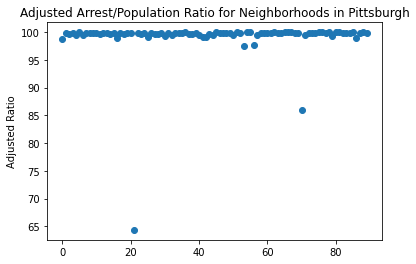

In [23]:
nums = list(range(len(ratios_adj)))
ratios_adj = vals_ratio_adj.values()
plt.scatter(nums, ratios_adj)
plt.ylabel("Adjusted Ratio")  
plt.title("Adjusted Arrest/Population Ratio for Neighborhoods in Pittsburgh")
plt.show()

This visualization is just meant to show that there is a clear outlier for worst neighborhood and a best neighborhood in accordance to this metric. We can later find that those are:

In [26]:
max_value = max(vals_ratio_adj, key=vals_ratio_adj.get)
print(max_value)

min_value = min(vals_ratio_adj, key=vals_ratio_adj.get)
print(min_value)

Squirrel Hill North
Chateau


Best: Squirrel Hill North, with an adjusted ratio of 99.978
Worst: Chateau (as expected), with an adjusted ratio of 64.364